In [1]:
rm(list=ls())

#########################################################################
### -- ANALITICA PREDICTIVA DE DATOS -- ## 
#########################################################################

#########################################################################



########### 1) LIBRERIAS A UTILIZAR ################# 
source("./ins_paquetes.R")
ins_paquetes('tictoc','data.table','ade4','fpc','compareGroups','LICORS',
             'corrplot','lattice','sqldf','ggplot2','mlr','flexclust','h2o','tidyverse',
             'cluster','factoextra','attempt','ClustImpute')

#options(warn=-1)

oldw <- getOption("warn")
options(warn = -1)

library(tictoc)
#https://cran.r-project.org/web/packages/tictoc/tictoc.pdf
#tic - Starts the timer and stores the start time and the message on the stack.
#toc - Notes the current timer and computes elapsed time since the matching call to tic(). When
#quiet is FALSE, prints the associated message and the elapsed time.

library(data.table)
library(factoextra)
library(cluster)
library(corrplot)
library(ade4)
library(fpc)
library(compareGroups)
library(LICORS)
library(flexclust)
library(h2o)
library(tidyverse)
library(mlr)
library(attempt)
library(ClustImpute)

options(warn = oldw) # silencia los warnings until this line

Warning message:
"package 'data.table' was built under R version 3.6.3"Warning message:
"package 'ade4' was built under R version 3.6.3"Warning message:
"package 'fpc' was built under R version 3.6.3"Warning message:
"package 'compareGroups' was built under R version 3.6.3"Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
Warning message:
"package 'LICORS' was built under R version 3.6.3"Warning message:
"package 'corrplot' was built under R version 3.6.3"corrplot 0.84 loaded
Warning message:
"package 'sqldf' was built under R version 3.6.3"Warning message:
"package 'gsubfn' was built under R version 3.6.3"Warning message:
"package 'proto' was built under R version 3.6.3"Warning message:
"package 'RSQLite' was built under R version 3.6.3"Error: package or namespace load failed for 'RSQLite' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 namespace 'blob' 1.1.1 is being loaded, but >= 1.2.0 is required
Regist


Bellow Packages Successfully Installed:

       tictoc    data.table          ade4           fpc compareGroups 
         TRUE          TRUE          TRUE          TRUE          TRUE 
       LICORS      corrplot       lattice         sqldf       ggplot2 
         TRUE          TRUE          TRUE         FALSE          TRUE 
          mlr     flexclust           h2o     tidyverse       cluster 
         TRUE          TRUE          TRUE          TRUE          TRUE 
   factoextra       attempt   ClustImpute 
         TRUE          TRUE          TRUE 


In [2]:
########### 2) DATA A UTILIZAR ################# 

setwd(".")
getwd()

[1] "C:/Users/Aron/Desktop/Analitica/S9"

In [3]:
##En un estudio se midió la calidad de atención de los asesores de llamadas a través
##de un puntaje de satisfacción de 0 a 10


## En Rstudio Cloud utilizar el siguiente comando
# my_data <- data.table::fread("./BDD_Calidad_Telcom.csv")

## En Rstudio de escritorio utilizar el siguiente comando

tictoc::tic()
my_data <- data.table::fread("./datasets/BDD_Calidad_Telcom.csv",dec= ",")
tictoc::toc()

0.29 sec elapsed


In [4]:
# 0.11 sec elapsed

########### 3) TRATAMIENTO DE LA DATA ################# 

########### DESCRIPCION DE LOS DATOS ##################

#A:La facilidad de comunicarse con la central de llamadas de la empresa sin tener que
#marcar varias veces.
#B:La utilidad de poder seleccionar el idioma
#C:La sencillez del menú de opciones del sistema
#D:El tiempo de espera hasta que una persona contesta
#E:La amabilidad y cordialidad mostrado por la persona
#F:El interés y compromiso del personal por atender
#G: La capacidad o nivel de conocimiento del personal
#H: La claridad de la información brindada por la persona
#J: El tiempo utilizado por el asesor para atenderlo.
#M: La solución brindada a su gestión.




## en primer lugar ver el analisis descriptivo de la data

resumen <- data.frame(mlr::summarizeColumns(my_data))
resumen
write.csv(resumen,"tabla_resumen_cluster.csv")

name,type,na,mean,disp,median,mad,min,max,nlevs
TP08A,numeric,0,6.194074,3.151990,6.67,3.306198,0,10,0
TP08B,numeric,0,7.006187,3.073725,7.78,3.291372,0,10,0
TP08C,numeric,0,6.820377,3.020185,7.78,3.291372,0,10,0
TP08D,numeric,0,5.857166,3.117037,6.00,3.958542,0,10,0
TP08E,numeric,0,7.590302,2.985177,8.89,1.645686,0,10,0
TP08F,numeric,0,7.056565,3.049086,7.78,3.291372,0,10,0
TP08G,numeric,0,6.928921,3.121732,7.78,3.291372,0,10,0
TP08H,numeric,0,7.143016,3.059867,7.78,3.291372,0,10,0
TP08J,numeric,0,6.773243,2.990375,7.78,3.291372,0,10,0
TP08M,numeric,0,6.669617,3.417239,7.78,3.291372,0,10,0


In [5]:
## procederemos a la estandarizar la base de datos

## Para estandarizar los datos (center y scale)
datos.s <- as.data.frame(scale(my_data))
str(datos.s)

'data.frame':	9823 obs. of  10 variables:
 $ TP08A: num  0.573 0.503 -0.379 1.207 1.207 ...
 $ TP08B: num  0.974 0.252 -0.653 0.252 0.649 ...
 $ TP08C: num  1.053 1.053 -0.603 1.053 0.722 ...
 $ TP08D: num  0.687 0.261 -0.596 1.329 1.008 ...
 $ TP08E: num  0.807 0.435 -0.533 0.807 -0.198 ...
 $ TP08F: num  0.637 0.237 -0.674 0.965 0.309 ...
 $ TP08G: num  0.663 0.273 -0.618 0.984 0.343 ...
 $ TP08H: num  -0.0467 0.5709 -1.0272 0.5709 0.6069 ...
 $ TP08J: num  0.7446 0.7079 -0.593 1.079 0.0758 ...
 $ TP08M: num  0.389 0.975 -0.196 0.975 0.389 ...


In [6]:
## procederemos a guardar la base estandarizada en nuestra base de datos
save(my_data, datos.s, file = "BDD_Calidad.Rdata")
system.time(load("BDD_Calidad.Rdata"))

   user  system elapsed 
      0       0       0 

In [7]:
########### 4) MODELAMIENTO DE LA BASE DE DATOS ################# 

###################
#### -- OJO -- ####
###################

## en primer lugar trabajaremos la data sin estandarizar para una
## comparacion con los datos tratados.

## Visualizando la estructura de los datos
str(my_data)

Classes 'data.table' and 'data.frame':	9823 obs. of  10 variables:
 $ TP08A: num  8 7.78 5 10 10 6.67 5 5 6.67 7.78 ...
 $ TP08B: num  10 7.78 5 7.78 9 10 4 6 8.89 10 ...
 $ TP08C: num  10 10 5 10 9 4.44 5 4 4.44 7.78 ...
 $ TP08D: num  8 6.67 4 10 9 3.33 5 5 1.11 4.44 ...
 $ TP08E: num  10 8.89 6 10 7 8.89 6 5 5.56 10 ...
 $ TP08F: num  9 7.78 5 10 8 8.89 4 4 6.67 10 ...
 $ TP08G: num  9 7.78 5 10 8 5.56 4 4 3.33 10 ...
 $ TP08H: num  7 8.89 4 8.89 9 5.56 4 4 4.44 10 ...
 $ TP08J: num  9 8.89 5 10 7 6.67 5 5 1.11 10 ...
 $ TP08M: num  8 10 6 10 8 7.78 5 5 0 10 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [8]:
## Visualizando los primeros 5 registros
head(my_data, n = 5)

TP08A,TP08B,TP08C,TP08D,TP08E,TP08F,TP08G,TP08H,TP08J,TP08M
8.00,10.00,10,8.00,10.00,9.00,9.00,7.00,9.00,8
7.78,7.78,10,6.67,8.89,7.78,7.78,8.89,8.89,10
5.00,5.00,5,4.00,6.00,5.00,5.00,4.00,5.00,6
10.00,7.78,10,10.00,10.00,10.00,10.00,8.89,10.00,10
10.00,9.00,9,9.00,7.00,8.00,8.00,9.00,7.00,8


In [9]:
## Visualizando estadisticas resumen de los datos
summary(my_data)

     TP08A            TP08B            TP08C           TP08D       
 Min.   : 0.000   Min.   : 0.000   Min.   : 0.00   Min.   : 0.000  
 1st Qu.: 4.000   1st Qu.: 4.440   1st Qu.: 4.44   1st Qu.: 4.000  
 Median : 6.670   Median : 7.780   Median : 7.78   Median : 6.000  
 Mean   : 6.194   Mean   : 7.006   Mean   : 6.82   Mean   : 5.857  
 3rd Qu.: 8.890   3rd Qu.:10.000   3rd Qu.:10.00   3rd Qu.: 8.890  
 Max.   :10.000   Max.   :10.000   Max.   :10.00   Max.   :10.000  
     TP08E           TP08F            TP08G            TP08H       
 Min.   : 0.00   Min.   : 0.000   Min.   : 0.000   Min.   : 0.000  
 1st Qu.: 6.00   1st Qu.: 5.000   1st Qu.: 4.440   1st Qu.: 5.000  
 Median : 8.89   Median : 7.780   Median : 7.780   Median : 7.780  
 Mean   : 7.59   Mean   : 7.057   Mean   : 6.929   Mean   : 7.143  
 3rd Qu.:10.00   3rd Qu.:10.000   3rd Qu.:10.000   3rd Qu.:10.000  
 Max.   :10.00   Max.   :10.000   Max.   :10.000   Max.   :10.000  
     TP08J            TP08M      
 Min.   : 0.00

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


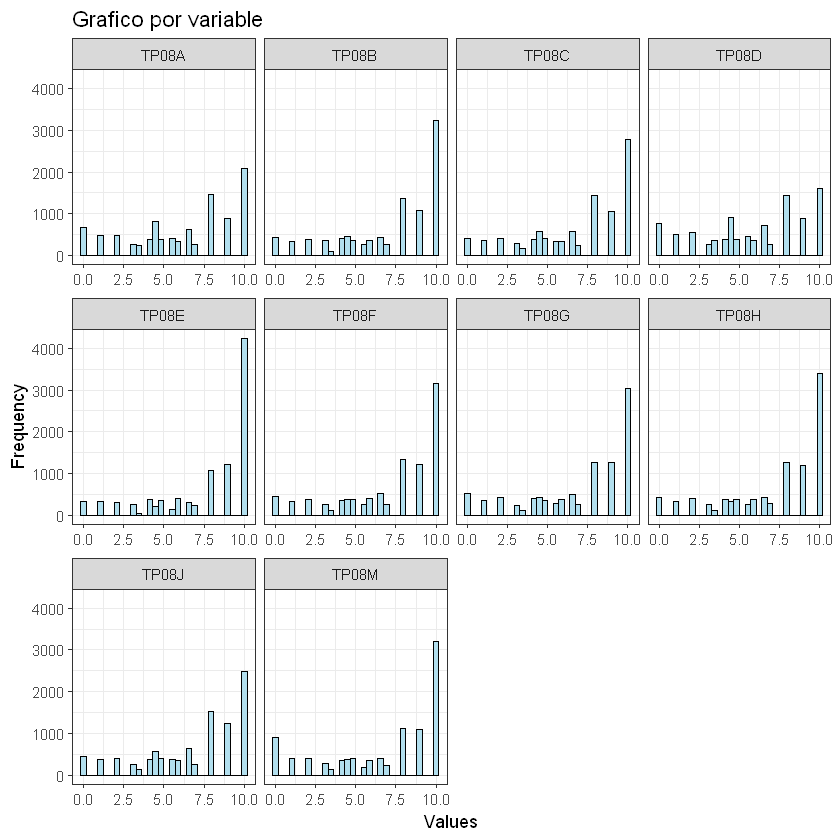

In [10]:
## Visualizando estadisticas resumen de los datos en base a histogramas
my_data %>%
  gather(attributes, value, 1:10) %>%
  ggplot(aes(x = value)) +
  geom_histogram(fill = 'lightblue2', color = 'black') +
  facet_wrap(~attributes, scales = 'free_x') +
  labs(x="Values", y="Frequency",title="Grafico por variable") +
  theme_bw()

158.71 sec elapsed


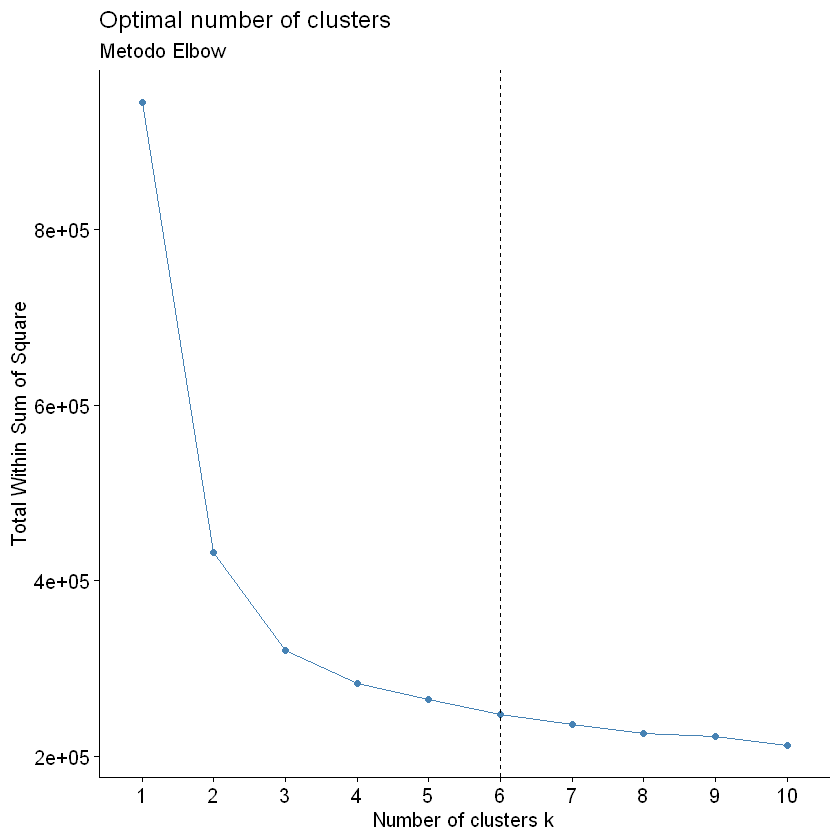

In [11]:
## obteniendo el numero optimo de cluster (k) 

# 1. Usando el criterio de Suma de Cuadrados dentro 
#    de clusters (sse o wss)

# 1.1. Usando el metodo wss

# metodo: "wss" (for total within sum of square)
tictoc::tic()
set.seed(123)
factoextra::fviz_nbclust(my_data, kmeans, method = "wss") +
  geom_vline(xintercept = 6, linetype = 2) +
  labs(subtitle = "Metodo Elbow")
tictoc::toc()
# 107.91 sec elapsed

4.62 sec elapsed


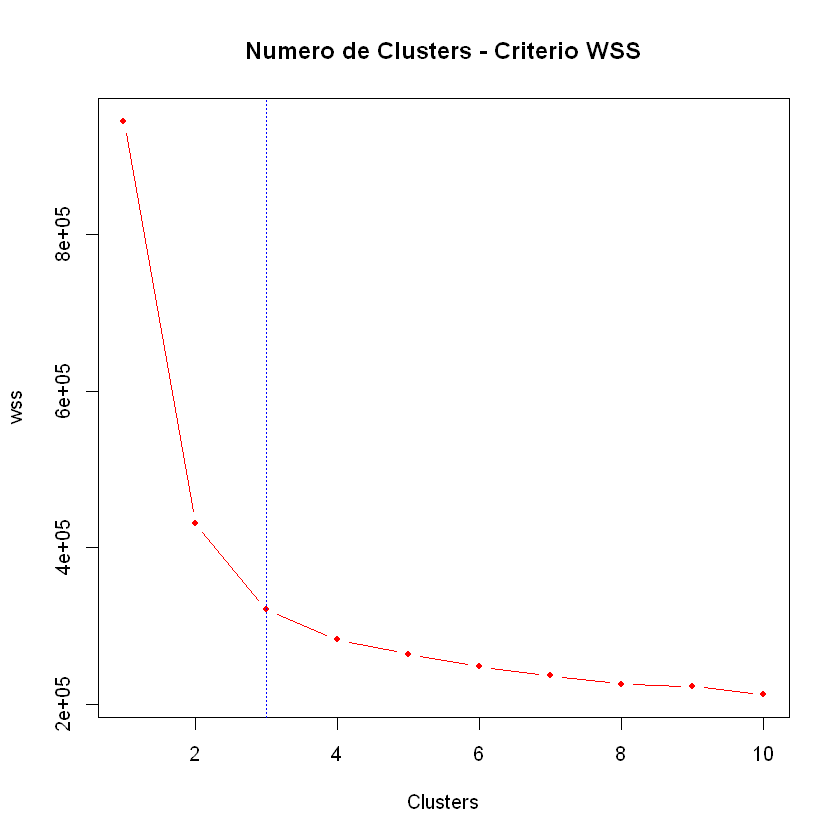

In [12]:
# 1.2. Usando la funcion kmeans()
tictoc::tic()
set.seed(123)
wss <- numeric()
for(h in 1:10){
  b<-kmeans(my_data,h)
  wss[h]<-b$tot.withinss
}
plot(1:10,wss, type="b",col="red", 
     pch=20 ,xlab = "Clusters", 
     main= "Numero de Clusters - Criterio WSS")
abline(v = 3, col = "blue", lty=3)
tictoc::toc()
# 0.61 sec elapsed

Warning message:
"did not converge in 10 iterations"

6.95 sec elapsed


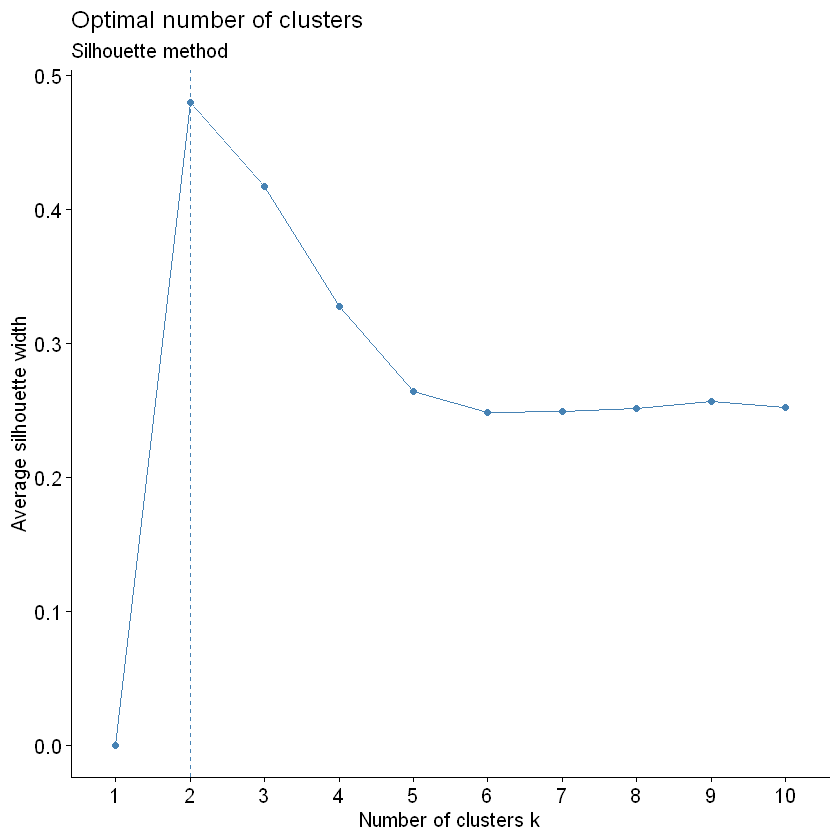

In [13]:
# 2.1. Usando el methodo de silhouette
tictoc::tic()
set.seed(123)
factoextra::fviz_nbclust(my_data, kmeans, method = "silhouette") +
  labs(subtitle = "Silhouette method")
tictoc::toc()
# 11.73 sec elapsed

15.19 sec elapsed


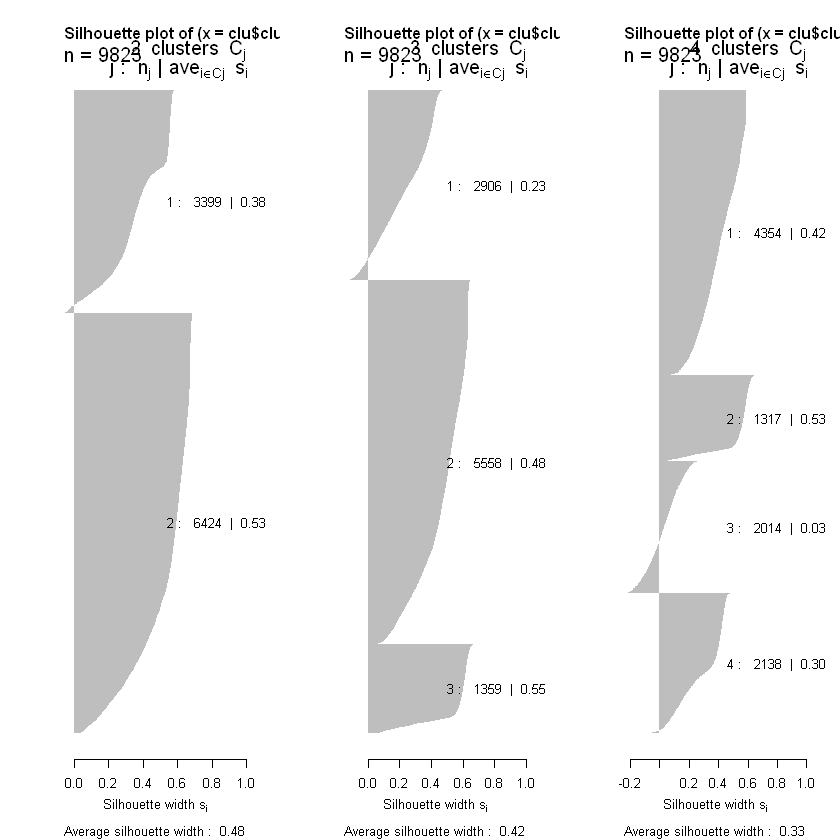

In [14]:
# 2.2. Usando la funcion k-means

# daisy : calcula distancias, por default : la euclidean

windows()
tic()
set.seed(123)


#diss.datos -->Daisy:::Dissimilarity Matrix Calculation
#Compute all the pairwise dissimilarities (distances) between observations 
#in the data set. The original variables may be of mixed types. 
#In that case, or whenever metric = "gower" is set, 
#a generalization of Gower's formula is used, 


diss.datos <- cluster::daisy(my_data) #daisy(x, metric = c("euclidean", "manhattan", "gower"),
#stand = FALSE, type = list(), weights = rep.int(1, p),
#warnBin = warnType, warnAsym = warnType, warnConst = warnType,

par(mfrow=c(1,3))
for(h in 2:4){
  clu <- kmeans(my_data,h)
  plot(cluster::silhouette(clu$cluster,diss.datos))
}
toc()
par(mfrow=c(1,1))

In [ ]:
## Aplicando el numero de cluster de lo observado

set.seed(123)
km <- kmeans(my_data, 
             centers=3,      # Numero de Cluster
             nstart = 25,    # Numero de puntos iniciales
             iter.max = 100) # Numero de iteraciones maxima

print(km)

# Sumas de cuadrados
km$withinss     # Suma de cuadrados dentro de cada cluster
km$tot.withinss # suma de cuadrados Total dentro de cada cluster
km$totss        # Suma de cuadrados total suma(cuadrado(x - media))
km$betweenss    # Suma de cuadrados entre cluster. 
# Se obtiene por diferencia 

# Tamano de cada cluster
km$size

# Promedios de cada cluster 
km$centers

# Otra forma de obtener promedios de cada cluster
aggregate(my_data, by=list(cluster=km$cluster), mean)

# Junta el archivo de datos con la columna de cluster
datosk <- cbind(my_data,grp = km$cluster)

head(datosk , 3)

## Exportamos la data para su analisis
write.csv(datosk,"BDD_Calidad_Telcom_con_kmeans.csv")

## Visualizacion de los cluster en la base de datos

factoextra::fviz_cluster(km, data = my_data, ellipse.type = "convex") + labs (title = "Resultado cluster k means")
ggplot2::theme_classic()

## usando otra libreria
zz <- factoextra::fviz_cluster(km, data = my_data, ellipse.type = "convex") + labs (title = "Resultado cluster k means")
ggplot2::theme_classic()
  
plotly::ggplotly(zz)

#### --  Validacion de Resultados del k-means -- ####
# Bootstrap Evaluation of Clusters
tictoc::tic()
kclusters <- fpc::clusterboot(my_data,
                         B=100,
                         clustermethod=kmeansCBI,
                         k=3,
                         seed=123)
tictoc::toc()
# 2.89 sec elapsed

## Los promedios deben salir lo m?s cercano a 1 posible.
# Un valor > 0.75 o 0.85 es muy bueno.
# Un valor < 0.6 es malo
  
kclusters$bootmean

## Importancia de las variables
cl_km <- flexclust::as.kcca(km, my_data) 
str(cl_km)
cl_km@xcent    # Promedios de cada variable
cl_km@centers  # Promedios de cada variable por cada cluster
windows()
barplot(cl_km)

########## AHORA REALICEMOS CON LA DATA ESTANDARIZADA #####
##### COMPAREMOS ####

K-means clustering with 3 clusters of sizes 2906, 1359, 5558

Cluster means:
     TP08A    TP08B    TP08C    TP08D    TP08E    TP08F    TP08G    TP08H
1 4.730392 5.890145 5.594687 4.458544 6.749209 5.753820 5.501858 5.882134
2 1.522318 1.926475 2.020346 1.487123 1.967101 1.570640 1.480574 1.609566
3 8.101662 8.831761 8.634896 7.656965 9.405011 9.079082 9.007249 9.155266
     TP08J    TP08M
1 5.492746 4.900076
2 1.636431 1.393694
3 8.698766 8.884851

Clustering vector:
   [1] 3 3 1 3 3 1 1 1 1 3 3 3 1 3 3 3 2 1 2 3 3 1 1 1 1 1 3 3 3 3 1 3 3 1 2 3 1
  [38] 2 1 1 3 2 1 1 3 3 2 1 3 1 3 2 3 3 3 3 2 3 3 1 3 3 3 3 3 3 3 1 3 1 2 2 1 1
  [75] 3 2 3 1 2 3 3 3 1 1 1 1 3 3 3 3 3 3 1 3 3 1 1 3 3 1 1 1 2 3 3 3 3 3 3 1 1
 [112] 3 1 1 3 2 2 3 1 3 3 3 3 3 2 3 3 1 1 1 3 1 1 1 3 3 1 1 2 3 2 1 3 3 3 1 3 3
 [149] 3 3 3 3 3 3 3 2 3 1 2 3 1 3 3 3 1 2 2 3 3 3 3 3 3 3 3 1 3 1 3 3 3 3 2 3 3
 [186] 3 3 1 3 3 1 1 3 3 1 2 3 2 3 2 1 3 1 1 1 3 3 1 3 3 2 2 3 1 3 3 1 1 2 3 3 3
 [223] 3 1 2 3 2 3 2 3 2 1 2 1 3 1 3 3 3 

[1] 143739.0  34171.3 143261.9

[1] 321172.2

[1] 944447.5

[1] 623275.3

[1] 2906 1359 5558

TP08A,TP08B,TP08C,TP08D,TP08E,TP08F,TP08G,TP08H,TP08J,TP08M
4.730392,5.890145,5.594687,4.458544,6.749209,5.753820,5.501858,5.882134,5.492746,4.900076
1.522318,1.926475,2.020346,1.487123,1.967101,1.570640,1.480574,1.609566,1.636431,1.393694
8.101662,8.831761,8.634896,7.656965,9.405011,9.079082,9.007249,9.155266,8.698766,8.884851


cluster,TP08A,TP08B,TP08C,TP08D,TP08E,TP08F,TP08G,TP08H,TP08J,TP08M
1,4.730392,5.890145,5.594687,4.458544,6.749209,5.753820,5.501858,5.882134,5.492746,4.900076
2,1.522318,1.926475,2.020346,1.487123,1.967101,1.570640,1.480574,1.609566,1.636431,1.393694
3,8.101662,8.831761,8.634896,7.656965,9.405011,9.079082,9.007249,9.155266,8.698766,8.884851


TP08A,TP08B,TP08C,TP08D,TP08E,TP08F,TP08G,TP08H,TP08J,TP08M,grp
8.00,10.00,10,8.00,10.00,9.00,9.00,7.00,9.00,8,3
7.78,7.78,10,6.67,8.89,7.78,7.78,8.89,8.89,10,3
5.00,5.00,5,4.00,6.00,5.00,5.00,4.00,5.00,6,1


List of 60
 $ line                 :List of 6
  ..$ colour       : chr "black"
  ..$ size         : num 0.5
  ..$ linetype     : num 1
  ..$ lineend      : chr "butt"
  ..$ arrow        : logi FALSE
  ..$ inherit.blank: logi TRUE
  ..- attr(*, "class")= chr [1:2] "element_line" "element"
 $ rect                 :List of 5
  ..$ fill         : chr "white"
  ..$ colour       : chr "black"
  ..$ size         : num 0.5
  ..$ linetype     : num 1
  ..$ inherit.blank: logi TRUE
  ..- attr(*, "class")= chr [1:2] "element_rect" "element"
 $ text                 :List of 11
  ..$ family       : chr ""
  ..$ face         : chr "plain"
  ..$ colour       : chr "black"
  ..$ size         : num 11
  ..$ hjust        : num 0.5
  ..$ vjust        : num 0.5
  ..$ angle        : num 0
  ..$ lineheight   : num 0.9
  ..$ margin       : 'margin' num [1:4] 0pt 0pt 0pt 0pt
  .. ..- attr(*, "valid.unit")= int 8
  .. ..- attr(*, "unit")= chr "pt"
  ..$ debug        : logi FALSE
  ..$ inherit.blank: logi TRUE


List of 60
 $ line                 :List of 6
  ..$ colour       : chr "black"
  ..$ size         : num 0.5
  ..$ linetype     : num 1
  ..$ lineend      : chr "butt"
  ..$ arrow        : logi FALSE
  ..$ inherit.blank: logi TRUE
  ..- attr(*, "class")= chr [1:2] "element_line" "element"
 $ rect                 :List of 5
  ..$ fill         : chr "white"
  ..$ colour       : chr "black"
  ..$ size         : num 0.5
  ..$ linetype     : num 1
  ..$ inherit.blank: logi TRUE
  ..- attr(*, "class")= chr [1:2] "element_rect" "element"
 $ text                 :List of 11
  ..$ family       : chr ""
  ..$ face         : chr "plain"
  ..$ colour       : chr "black"
  ..$ size         : num 11
  ..$ hjust        : num 0.5
  ..$ vjust        : num 0.5
  ..$ angle        : num 0
  ..$ lineheight   : num 0.9
  ..$ margin       : 'margin' num [1:4] 0pt 0pt 0pt 0pt
  .. ..- attr(*, "valid.unit")= int 8
  .. ..- attr(*, "unit")= chr "pt"
  ..$ debug        : logi FALSE
  ..$ inherit.blank: logi TRUE


ERROR: Error in loadNamespace(name): there is no package called 'plotly'
